In [1]:
# importing the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans    # importing k-means module from scikit-learn package

In [2]:
# reading the dataset

data = pd.read_csv("student_evaluation.csv")

In [3]:
# seeing the dimensions

data.shape

(5820, 33)

In [4]:
# printing first few rows

data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# This problem is about course reviews
> So we have some informations about instructors which is inside the 'instr' column

> We have some information about the course and some questions related to that course (ex: how was the course content, was the course discussions satisfactory, etc.)

> So these sort of questions are captured in the columns Q1 to Q28 and the response shows the likeliness

In [5]:
# checking for missing values in the dataset

pd.isnull(data).sum()    # it calculates that there are null values in the dataset and returns the sum column wise

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

Here we see no missing values in the entire dataset

In [6]:
# describe our dataset

data.describe()    # used to generate descriptive statistics that summarize the central tendency

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
# create an object of the k-means module

kmeans = KMeans(n_clusters=2)    # initialising with two clusters

In [9]:
# fit the k-means model on our dataset

kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# predicting the clusters

pred = kmeans.predict(data)    # predictions stored in the pred variable

In [11]:
# print the predictions

pred

array([1, 1, 0, ..., 0, 1, 1])

For each row we'll get the cluster value, either 1 (one cluster) or 0 (another cluster)

In [13]:
# seeing the number of rows in cluster 0 and cluster 1

pd.Series(pred).value_counts()

1    3148
0    2672
dtype: int64

### So now how do we decide whether the clustering that we have done is good or not
> So there is an attribute in the K-Means object that is called the Inertia

> What Inertia returns is Sum of Squared Distance within cluster

> It tells how close the values are to the cluster centroid

> Larger this value is, the bad is our cluster as it is not compact. We want our model to have as low as the inertia value possible

In [14]:
# checking the inertia of the cluster

kmeans.inertia_

231353.7586857733

In [15]:
# the .score() function returns the negative value of .inertia_

kmeans.score(data)

-231353.75868577315

#### So this is how we have fitted our K-Means algorithm on our data with just 2 clusters
> As we have noticed this is very fast but somehow there is no measure to see how/what are the optimal number of clusters that we need to have

> So what we will do here is try to fit different number of clusters to the dataset and check against the inertia value

> Lower the value of inertia, better the clustering is

In [16]:
# we'll store the inertia (for ex.) in this list called SSE (Sum of Squares of errors)

SSE = []

#### So we'll be running our algorithm and creating our clusters from 1 to 20 and store the intertia of all these clusters in the SSE list

> This will take time depending on the cluster range and how big our dataset is

In [17]:
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster,n_jobs=-1)    # n_jobs: The number of jobs to use for the computation (``-1`` means using all processors)
    kmeans.fit(data)    # fit the data to the K-Means model generated
    SSE.append(kmeans.inertia_)    # append all the inertia values to the SSE list made

So we have calculated the inertia for different number of clusters

> We now create a dataframe which contains the number of clusters in one column and the inertia values in another column

In [19]:
# create dataframe of cluster and inertia

frame = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})

In [20]:
# printing the first few rows of this dataframe created

frame.head()

,Cluster,SSE
0,1,373025.672852
1,2,231353.758686
2,3,180375.766595
3,4,152888.206441
4,5,133016.306599


So now we need to find the optimal cluster value

> How it is generally done is basically using somthing called the 'Elbow-Curve'

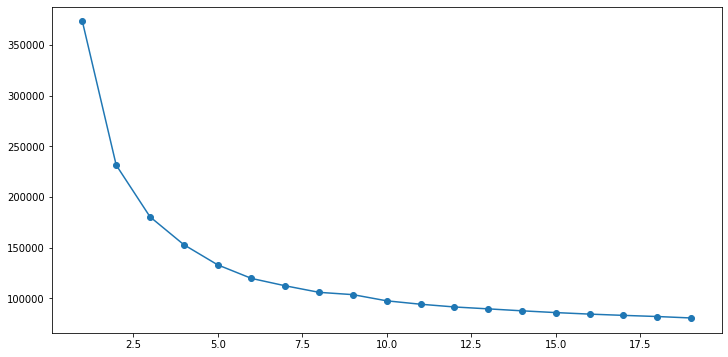

In [29]:
# now plotting the cluster vs. SSE values (x vs. y)

plt.figure(figsize=(12,6))    # figsize=(width,height in inches)
plt.plot(frame['Cluster'],frame['SSE'],marker='o')    #.plot(x,y,markerstyple=circle)

#### So this is what the curve looks like and it very much looks like an elbow

> So here our point is to find out where there is the last point till we get the maximum drop

> The drop from the 1st point in the curve keeps on decreasing and hence 6 or 7 is the ideal number of clusters because as after that if we keep on increasing the cluster, the reduction/drop in SSE gets minimal and minimal

> So here, ideally for optimal number of cluster, we want them to be 6 or 7 clusters

> But, care has to be taken that this is not a deterministic way or that this is a sure shot answer for this (so cluster values can be different, depends on the purpose and the business use case)

#### But, now this was when our dataset was raw and we have not done any pre-processing on the dataset

> The scales were almost relatively same but they were not same (to be exact) (the max., 75 percentile, etc. values varied and so on)

> So generally, K-Means use the distance metric, we would want the distance to be on the equal scale (everything will have the same scale)

> So here what we will do is, we'll transform our data using the scikit-learn StandardScaler module from the pre-processing package (what it does is scale the values such that they have 0 mean and standard deviation of 1)

In [24]:
# scaling the data using the .fit_transform() function inside scalar module

from sklearn.preprocessing import StandardScaler    # import the required module
scaler = StandardScaler()    # creating a object variable for the scalar module
data_scaled = scaler.fit_transform(data)    # transform our data by scaling/normalising it

In [26]:
# looking at our scaled dataset using the .describe() function

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,...,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03,5.820000e+03
mean,-1.459981e-14,8.602130e-15,-7.344278e-15,-1.382514e-15,2.960976e-16,1.688760e-15,-1.091681e-15,-2.070890e-16,2.644849e-15,-8.257618e-16,...,-2.832251e-15,1.454354e-16,3.596054e-15,3.714783e-15,1.333717e-15,1.432836e-15,1.561485e-15,2.261345e-15,7.546464e-16,-1.237956e-15
std,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,...,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00,1.000086e+00
min,-2.067850e+00,-1.701879e+00,-4.021740e-01,-1.136118e+00,-1.322221e+00,-1.439189e+00,-1.613740e+00,-1.738145e+00,-1.621254e+00,-1.646630e+00,...,-1.783194e+00,-1.790026e+00,-1.817034e+00,-1.827343e+00,-1.730392e+00,-1.698417e+00,-1.839472e+00,-1.748929e+00,-1.668120e+00,-1.805160e+00
25%,-6.758900e-01,-8.883988e-01,-4.021740e-01,-1.136118e+00,-1.322221e+00,-6.934552e-01,-8.356154e-01,-9.403527e-01,-8.427308e-01,-8.646959e-01,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-9.445255e-01,-9.145943e-01,-2.486068e-01,-9.618909e-01,-8.939823e-01,-2.409479e-01
50%,7.160704e-01,-7.491846e-02,-4.021740e-01,-4.580819e-01,1.605008e-01,5.227822e-02,-5.749034e-02,-1.425608e-01,-6.420806e-02,-8.276145e-02,...,-2.063210e-01,-2.235345e-01,-2.420638e-01,-2.503655e-01,-1.586587e-01,-1.307718e-01,-2.486068e-01,-1.748524e-01,-1.198450e-01,-2.409479e-01
75%,7.160704e-01,7.385619e-01,-4.021740e-01,8.979896e-01,9.018615e-01,7.980117e-01,7.206347e-01,6.552312e-01,7.143147e-01,6.991730e-01,...,5.821153e-01,5.597111e-01,5.454215e-01,5.381232e-01,6.272081e-01,6.530507e-01,5.468257e-01,6.121861e-01,6.542923e-01,5.411584e-01
max,7.160704e-01,1.552042e+00,3.354893e+00,1.576025e+00,1.643222e+00,1.543745e+00,1.498760e+00,1.453023e+00,1.492837e+00,1.481107e+00,...,1.370552e+00,1.342957e+00,1.332907e+00,1.326612e+00,1.413075e+00,1.436873e+00,1.342258e+00,1.399225e+00,1.428430e+00,1.323265e+00


So here we can see that everything has been normalised and everything looks like in the same scale

> So we'll repeat the above procedure for the elbow-curve method for this scaled data and let's see whether the optimal number of clusters change or do not change

In [27]:
SSE_scaled = []    # we'll store the inertia (for ex.) of the scaled dataset in this list called SSE

In [28]:
# getting the inertia values for the scaled dataset clusters

for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster,n_jobs=-1)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

Text(0, 0.5, 'SSE')

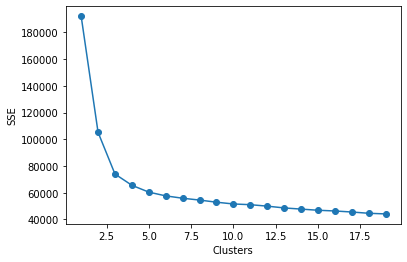

In [30]:
# create the dataframe for this scaled cluster and inertia values and plot the 'elbow-curve'

frame_scaled = pd.DataFrame({'Cluster':range(1,20),'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'],frame_scaled['SSE'],marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")

So here we can see that this graph looks very different from the earlier one where we use the unscaled dataset

> So here we have a very drop when we go from cluster number 1 to cluster number 2 then 3 then 4 and goes on saturating till 5

> So maybe the optimal number of clusters is 4 or 5 instead of the previous said 6 or 7

> Now, once we have the optimal number of clusters, we can go ahead and train our data using that optimal number of clusters

In [32]:
# using the optimal number of clusters to be 4 and training our model and predicting the clusters

kmeans = KMeans(n_clusters=4,n_jobs=-1)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

#### So, here we now have the predictions when we have used the optimal number of clusters as 4

> Let's look at the predictions

In [33]:
pred

array([2, 2, 3, ..., 3, 1, 1])

So, let's pick up one cluster value (for ex. cluster value of 2) and see whether we find any similarity or not

In [36]:
# checking similarity between cluster

frame = pd.DataFrame(data_scaled)    # creating dataframe for the scaled dataset
frame['Cluster'] = pred    # accessing the cluster column and assigning the predicted values we got as an array on each row
frame.loc[frame['Cluster']==2,:]    # printing all the columns where the cluster value is 2 (getting the location of the cluster value and print those rows in all the columns)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,Cluster
0,-2.06785,-1.430719,-0.402174,-1.136118,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
1,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
3,-2.06785,-1.430719,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
10,-2.06785,-1.430719,-0.402174,0.897990,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
11,-2.06785,-1.430719,-0.402174,0.897990,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,0.71607,1.552042,-0.402174,-0.458082,-0.580860,-0.693455,-0.835615,-0.940353,-0.842731,-0.864696,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
5797,0.71607,1.552042,-0.402174,-0.458082,-0.580860,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
5810,0.71607,1.552042,-0.402174,-0.458082,0.160501,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2
5811,0.71607,1.552042,-0.402174,1.576025,0.901862,0.052278,-0.057490,-0.142561,-0.064208,-0.082761,...,-0.223535,-0.242064,-0.250365,-0.158659,-0.130772,-0.248607,-0.174852,-0.119845,-0.240948,2


### So, here these are the rows where the cluster values are 2

> And on investigating, it does look like the values are almost the same in every column

> So it looks like we have done a good clustering